<a href="https://colab.research.google.com/github/febin-mathew/myfirstproject/blob/main/Intern_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
!cat titanic_train.txt | head

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [ ]:
titanic = pd.read_csv('titanic_train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


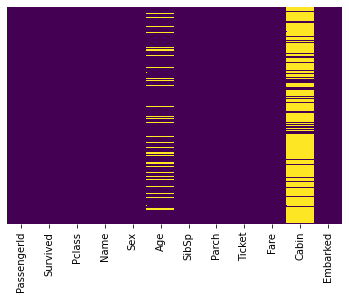

In [ ]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

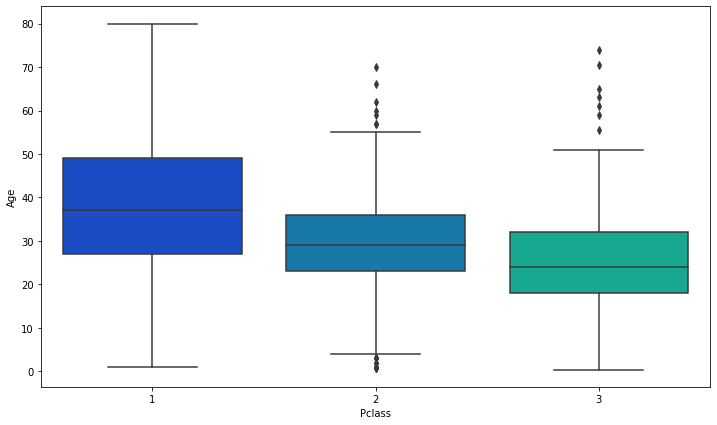

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age 

In [ ]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

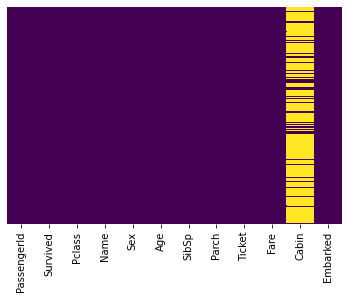

In [ ]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [ ]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

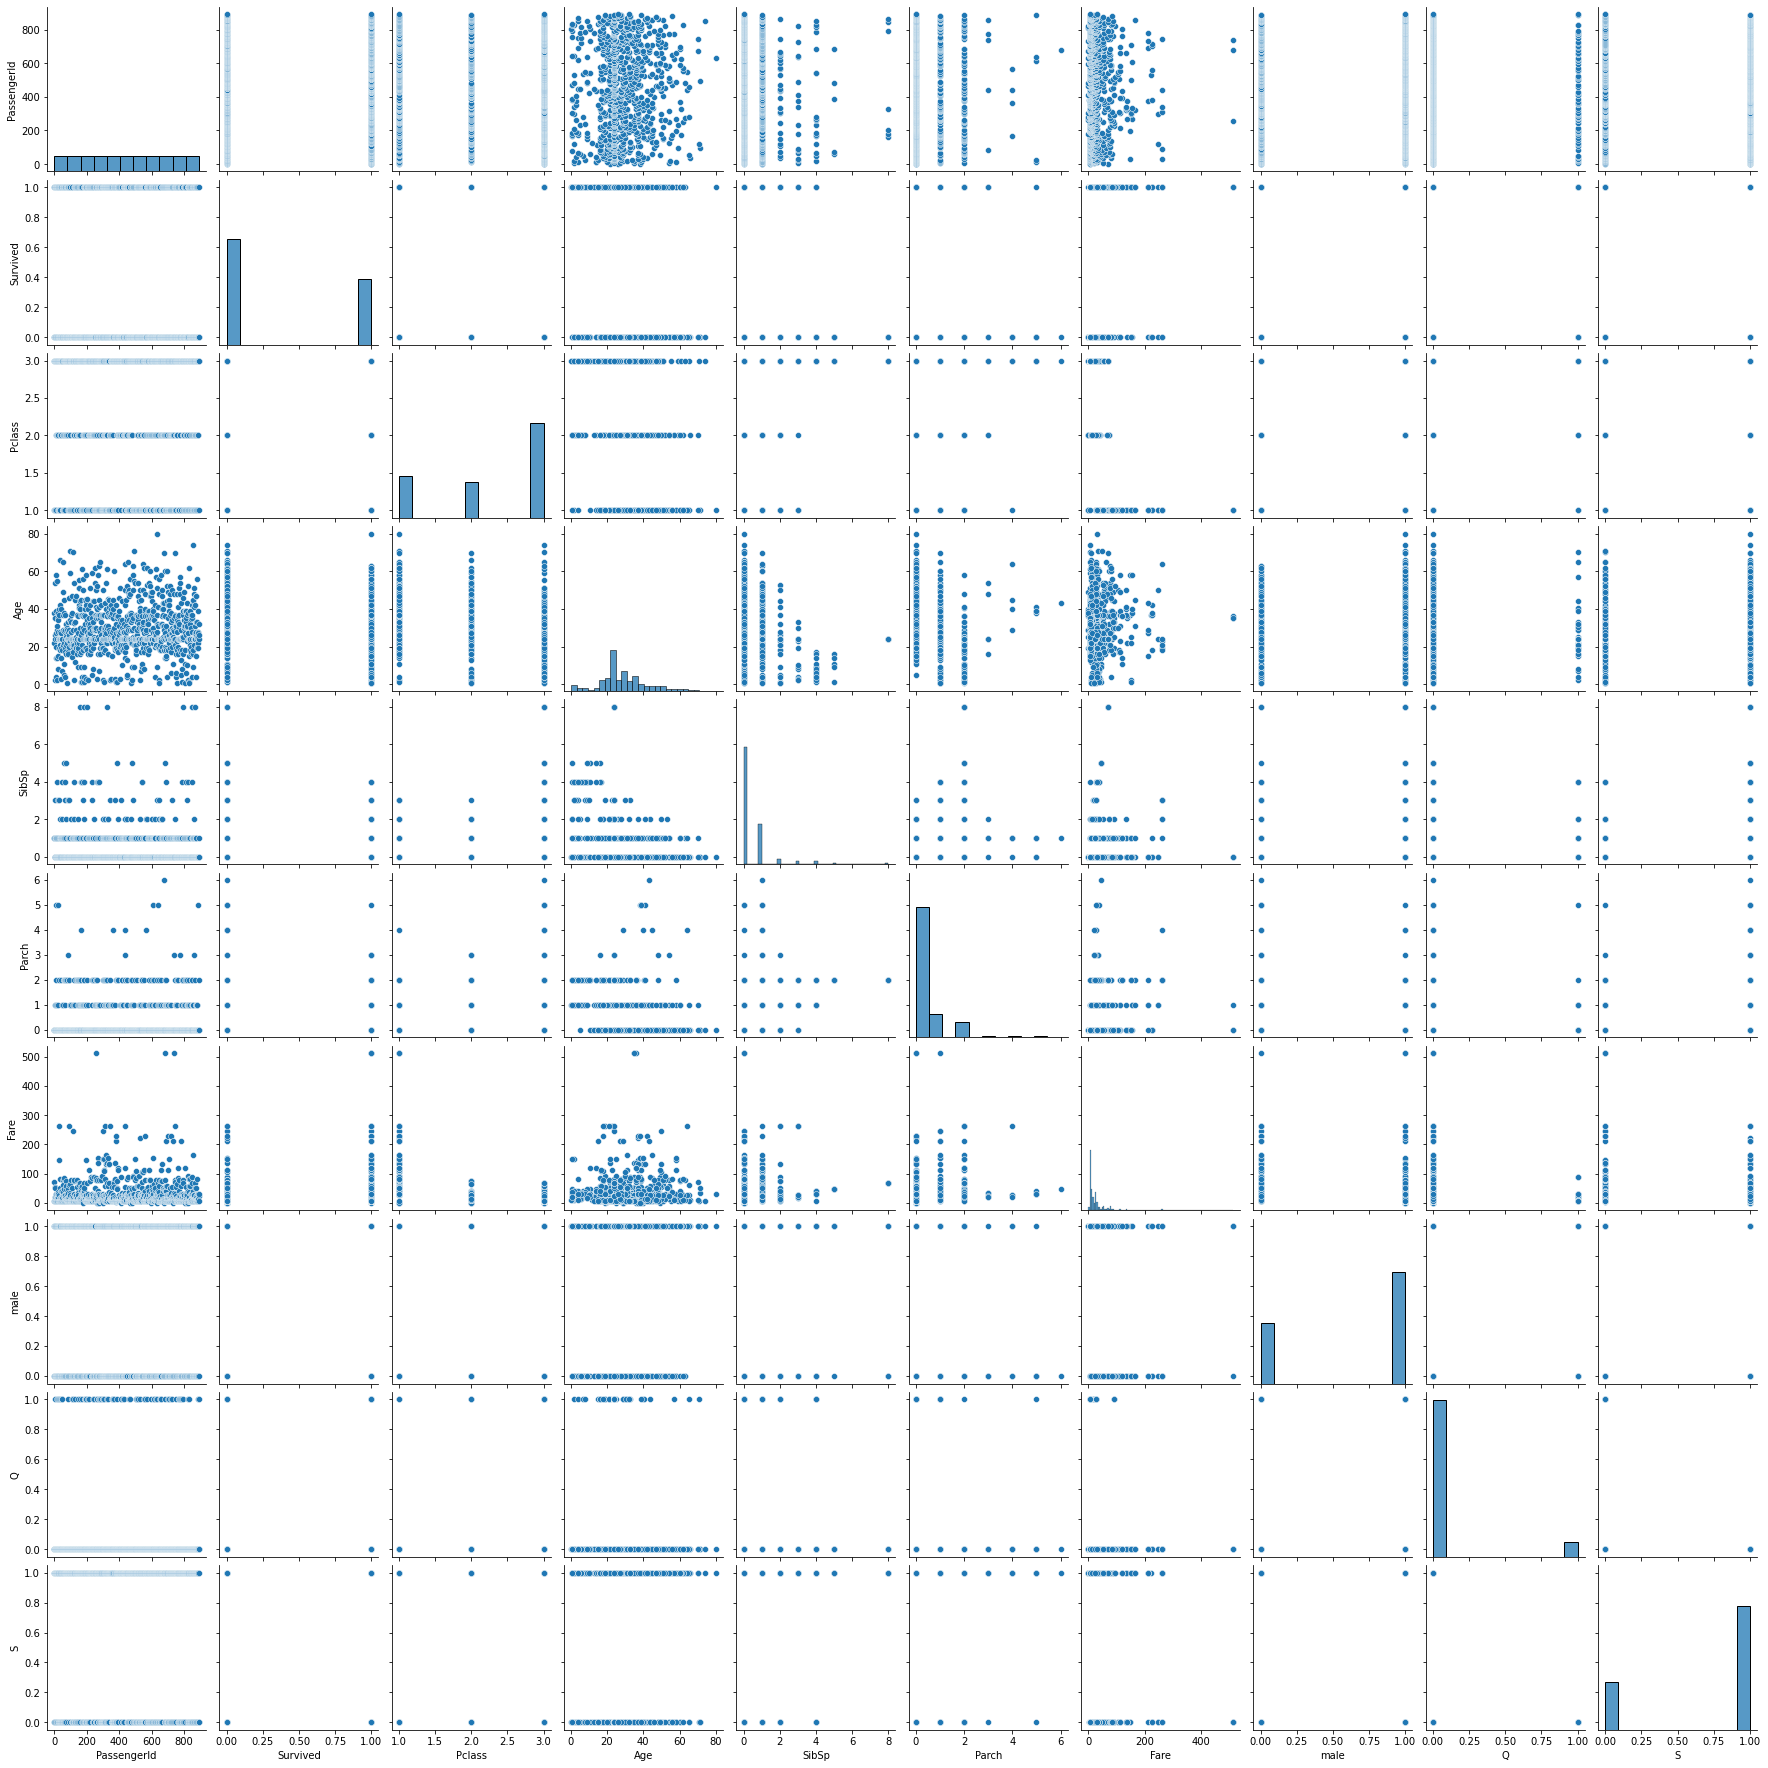

In [ ]:
sns.pairplot(titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


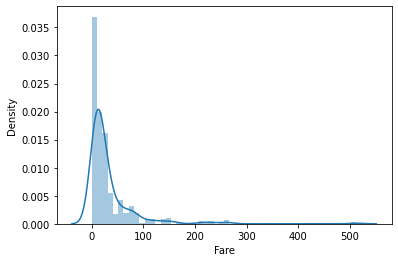

In [ ]:
sns.distplot(titanic['Fare'])

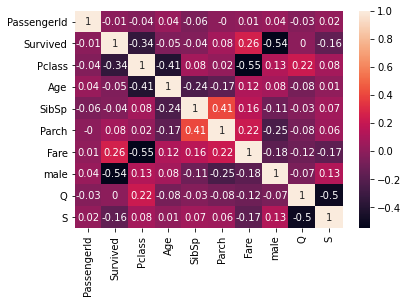

In [ ]:
correlation_matrix = titanic.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
x = titanic[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S']]
y = titanic['Fare']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4,random_state=101)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

106.81248946541005


In [ ]:
coeff_param = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [ ]:
coeff_param

,Coefficient
PassengerId,0.003480
Survived,5.602522
Pclass,-28.631134
Age,-0.215708
SibSp,6.573361
Parch,7.914446
male,-0.549705
Q,-11.921586
S,-17.489108
